In [55]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from prepare import explore_conflict, tts
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Train size was ajusted. outputs may be slightly different now and effect statistical relevance.

In [2]:
conflict=explore_conflict()

In [3]:
conflict.head()

,location,side_a,side_a_2nd,side_b,side_b_2nd,incompatibility,territory_name,type_of_conflict,start_date,start_date2,region,time_to_conflict
0,India,Government of India,0,GNLA,0,1,Garoland,3,1997-05-29,2012-11-15,3,5649
1,"Egypt, Israel",Government of Egypt,0,Government of Israel,0,1,Suez/Sinai,2,1967-06-05,1967-06-05,2,0
2,Sudan,Government of Sudan,0,Republic of South Sudan,0,1,Abyei,3,2011-05-01,2011-05-19,4,18
3,South Sudan,Government of South Sudan,0,"SSDM/A, SSLM/A",0,2,Government,3,2011-08-20,2011-08-20,4,0
4,Libya,Government of Libya,1,"Forces of Muammar Gaddafi, NTC",0,2,Government,4,2011-02-28,2011-03-04,4,4


In [4]:
conflict.shape

(294, 12)

In [5]:
conflict['time_to_conflict'].value_counts()

0        127
1         11
4          6
5          5
3          5
6          4
2          4
28         3
16         3
7          3
64         2
14         2
365        2
9          2
15         2
25         2
19         2
27         2
18         2
472        1
2198       1
400        1
307        1
417        1
1659       1
2526       1
5649       1
3324       1
832        1
1192       1
1283       1
3789       1
2696       1
347        1
1018       1
175        1
1030       1
244        1
1292       1
30         1
608        1
23         1
109        1
48         1
3089       1
52         1
67         1
3136       1
1379       1
13814      1
478        1
42         1
1218       1
683        1
8          1
809        1
117        1
66         1
183        1
775        1
51         1
462        1
387        1
4171       1
879        1
2295       1
1290       1
224        1
670        1
592        1
747        1
748        1
83         1
666        1
255        1
114        1
291        1

<AxesSubplot:xlabel='time_to_conflict', ylabel='Count'>

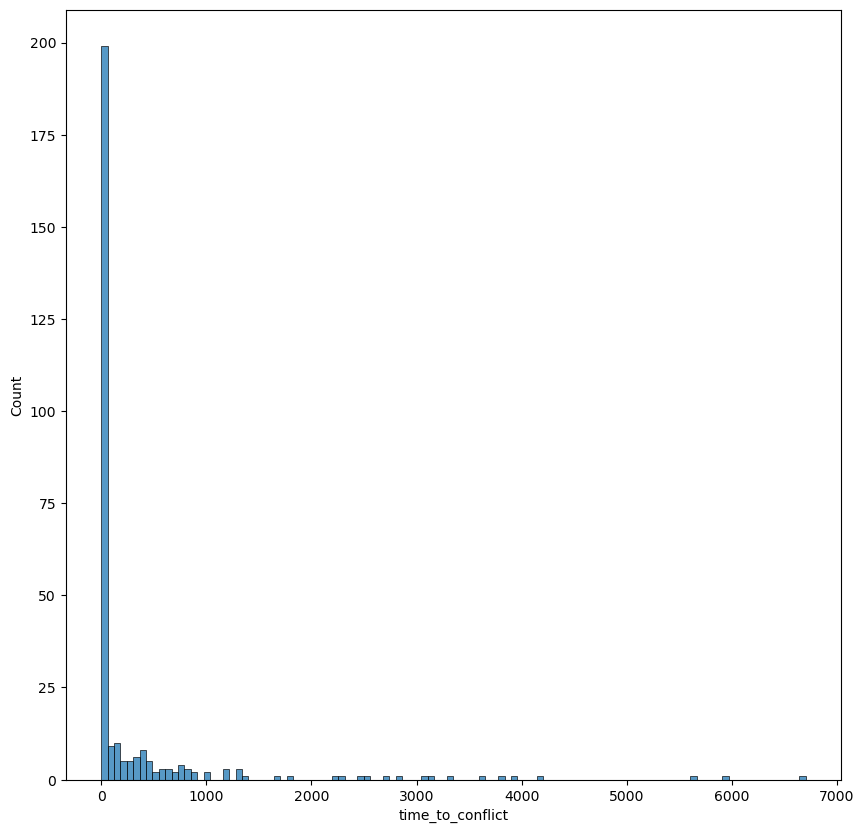

In [6]:
plt.figure(figsize=(10,10))
low=conflict[conflict['time_to_conflict']<7000]
sns.histplot(x='time_to_conflict', data=low)

<AxesSubplot:xlabel='time_to_conflict', ylabel='Count'>

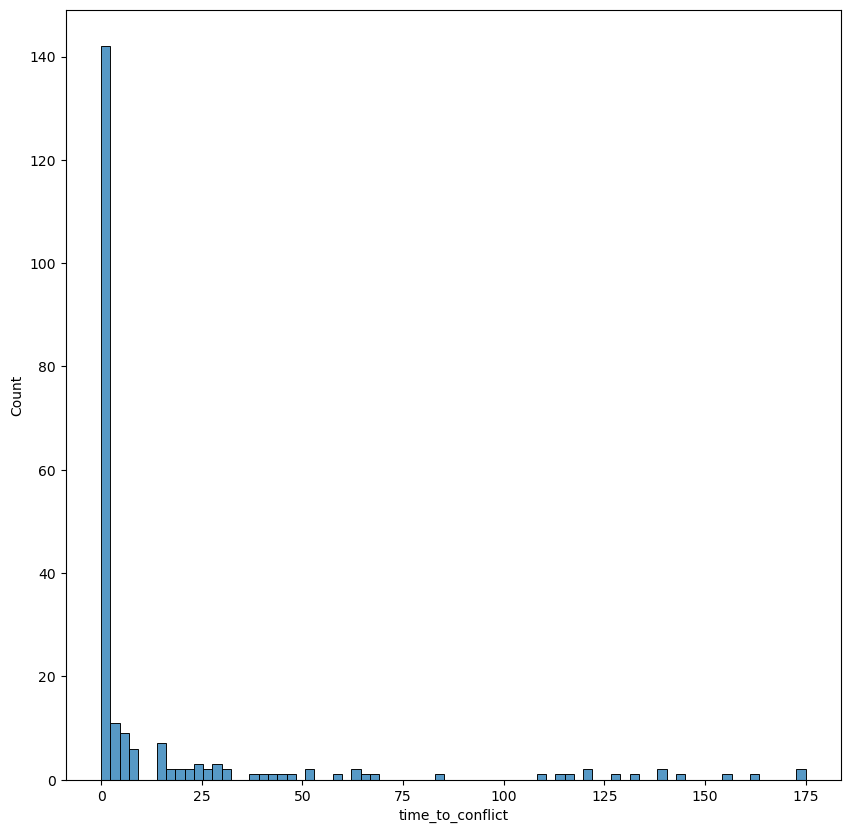

In [7]:
plt.figure(figsize=(10,10))
lowmed=conflict[conflict['time_to_conflict']<180]
sns.histplot(x='time_to_conflict', data=lowmed)

In [18]:
conflict['region'].value_counts()

4             104
3              78
2              38
1              37
5              26
1, 3            4
1, 2            3
1, 3, 5         1
1, 4            1
1, 5            1
1, 2, 3, 5      1
Name: region, dtype: int64

In [ ]:
def target_var_distribution():
    sns.histplot(x='time_to_conflict', data=conflict)

#  Initial look at the data
* Data was prepared:
    * Unnecessary columns were dropped
        * total columns were reduced from 28 to 12 (11 original columns and 1 engineered column)
    * Target variable was engineered from the `start_date` and `start_date2` columns
        * This returned a value (in days) for how long from the beginning of the conflict it took for the conflict to accumulate at least 25 casualties
    * Nulls were valuable:
        * Nulls were in `side_a_2nd`, `side_b_2nd`, and `territory_name`
            * `side_a_2nd` and `side_b_2nd` were encoded to a `0` or `1` depending if they had an ally or not
            * `territory_name` nulls were changed to "government" since null values were indicating there was no territorial conflict and that it was internal govermental conflict
    * There were an initial 2568 rows
        * The total number of rows was reduced to 294 because there were entries for each "episode" of the war (often on a yearly basis) and I just use the initial entry to predict the `time_to_conflict`
        

In [8]:
train, val, test=tts(conflict)

In [24]:
train.shape

(164, 12)

In [25]:
val.shape

(71, 12)

In [26]:
test.shape

(59, 12)

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Is the average time to conflict for countries in Asia significantlly higher compared to all other regions?</dt>
        <dd>- $H_0$: There is no difference in between the average time to conflict in Asia compared to all other regions</dd>
        <dd>- $H_a$: The average time to conflict in Asia is significantlly higher compared to all other regions</dd>
    </dl>
</div>

In [19]:
train['region'].value_counts()

4             56
3             38
2             27
1             22
5             14
1, 3           3
1, 5           1
1, 2, 3, 5     1
1, 2           1
1, 3, 5        1
Name: region, dtype: int64

In [34]:
train[train['region']=='3']

,location,side_a,side_a_2nd,side_b,side_b_2nd,incompatibility,territory_name,type_of_conflict,start_date,start_date2,region,time_to_conflict
154,Cambodia (Kampuchea),Government of Cambodia (Kampuchea),0,KR,0,2,Government,3,1967-04-30,1967-05-31,3,31
166,Pakistan,Government of Pakistan,0,Mukti Bahini,0,1,East Pakistan,3,1971-03-26,1971-03-26,3,0
8,Bangladesh,Government of Bangladesh,0,"PBCP, PBCP-J",0,2,Government,3,1994-04-24,2005-02-08,3,3943
12,Hyderabad,Government of Hyderabad,0,CPI,0,2,Government,3,1947-06-30,1947-06-30,3,0
85,Myanmar (Burma),Government of Myanmar (Burma),0,PNDF,0,1,Kachin,3,1949-12-31,1949-12-31,3,0
22,Afghanistan,Government of Afghanistan,1,IS,0,1,Islamic State,4,2015-02-09,2015-03-03,3,22
292,Myanmar (Burma),Government of Myanmar (Burma),0,LNUP,0,1,Lahu,3,1973-01-11,1973-02-28,3,48
218,India,Government of India,0,Kashmir insurgents,0,1,Kashmir,3,1984-02-06,1990-02-12,3,2198
31,Bangladesh,Government of Bangladesh,0,IS,0,1,Islamic State,3,2015-11-04,2016-08-29,3,299
90,China,Government of China,0,Tibet,0,1,Tibet,3,1950-10-07,1950-10-07,3,0


In [53]:
def q1_plots():
    '''
    This function plots the necessary plots to visualize explore question 1
    '''
    asia=train[train['region']=='3']
    notasia=train[train['region']!='3']
    plt.figure(figsize=(10,5))
    plt.subplot(221)
    sns.histplot(x='time_to_conflict', data=asia)
    plt.title('Time to Conflict (Asia)')
    plt.xlabel('Time to Conflict (days)')
    plt.grid(True, alpha=0.3, linestyle='--')

    plt.subplot(222)
    sns.histplot(x='time_to_conflict', data=notasia)
    plt.title('All Regions Excluding Asia')
    plt.xlabel('Time to Conflict (days)')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.figure(figsize=(25,10))
    plt.subplot(223)
    plt.title('Asia vs Other Regions (Time to Conflict)')
    sns.histplot(x='biology', data=a, alpha=.5, color='green', label= 'Asia')
    sns.histplot(x='biology', data=b, alpha=.25, label='Regions not Asia')
    plt.xlabel('Time to Conflict')
    plt.axvline(x=(asia['time_to_conflict'].mean()), color='red', label='Asia Mean')
    plt.axvline(x=(notasia['time_to_conflict'].mean()), color='yellow', label='Regions not Asia Mean')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()
    
    asiam=round(asia['time_to_conflict'].mean(),2)
    notasiam=round(notasia['time_to_conflict'].mean(),2)
    print(f'The mean time to conflict for Asia is {asiam}.')
    print(f'The mean time to conflict for all other regions is {notasiam}.')

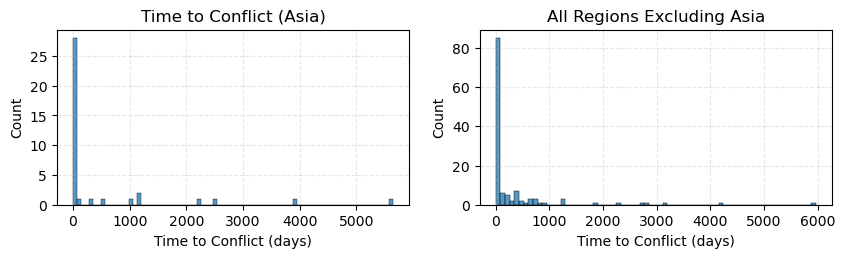

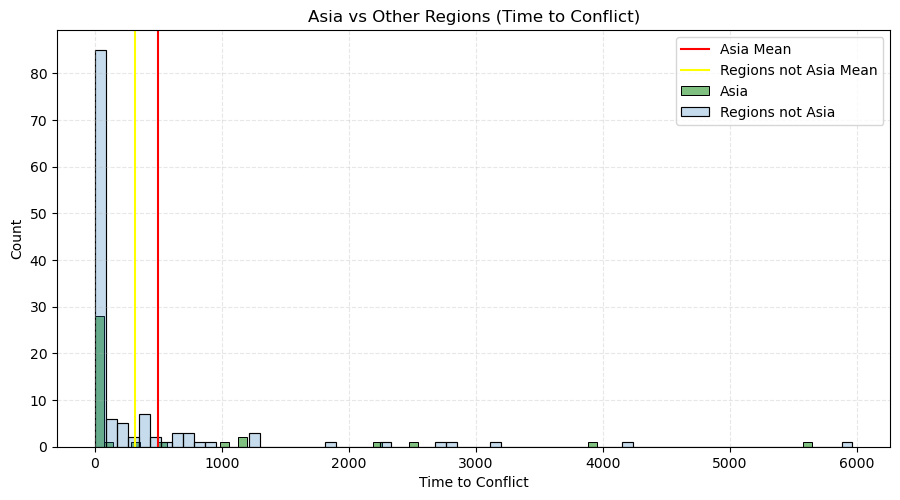

The mean time to conflict for Asia is 496.82.
The mean time to conflict for all other regions is 317.2.


In [54]:
q1_plots()

In [62]:
train['time_to_conflict']=train['time_to_conflict'].astype('int')

In [64]:
train['time_to_conflict'].dtype

dtype('int64')

In [65]:
asia=train[train['region']=='3']
notasia=train[train['region']!='3']

In [66]:
t, p=stats.ttest_ind(asia['time_to_conflict'], notasia['time_to_conflict'], alternative='greater')

In [67]:
t,p

(1.0464812487810764, 0.14844888873560447)

In [68]:
496.82-317.2

179.62

In [69]:
(496.82-317.2)/30

5.987333333333334

**Takeaway**  
* The p-value is lower than the alpha
* I can say with confidence that the average time to conflict in Asia is significantlly greater than the average time to conflict of all other regions combined
* The difference in the averages is 179.62 days or almost 6 months!

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>Is the average time to conflict for countries in Africa and the Middle East significantlly lower than the average time to conflict for all regions?</dt>
        <dd>- $H_0$: There is no difference in between the average time to conflict for African and Middle Eastern countries compared to all regions' average time to conflict</dd>
        <dd>- $H_a$: The average time_to_conflict for African and Middle Eastern countries is significantlly lower compared to all regions' time to conflict</dd>
    </dl>
</div>

In [89]:
def q2_plots():
    '''
    This function plots the necessary plots to visualize explore question 2
    '''
    ame=train[(train['region']=='2') | (train['region']=='4')]
    
    plt.figure(figsize=(10,5))
    plt.subplot(221)
    sns.histplot(x='time_to_conflict', data=ame)
    plt.title('Time to Conflict (Africa and Middle East)')
    plt.xlabel('Time to Conflict (days)')
    plt.grid(True, alpha=0.3, linestyle='--')

    plt.subplot(222)
    sns.histplot(x='time_to_conflict', data=train)
    plt.title('All Regions')
    plt.xlabel('Time to Conflict (days)')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.figure(figsize=(25,10))
    plt.subplot(223)
    plt.title('Africa and Middle East vs All Regions (Time to Conflict)')
    sns.histplot(x='time_to_conflict', data=ame, alpha=.5, color='green', label= 'Africa and Middle East')
    sns.histplot(x='time_to_conflict', data=train, alpha=.25, label='All Regions')
    plt.xlabel('Time to Conflict')
    plt.axvline(x=(ame['time_to_conflict'].mean()), color='red', label='Africa and Middle East Mean')
    plt.axvline(x=(train['time_to_conflict'].mean()), color='yellow', label='All Regions Mean')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()
    
    asiam=round(ame['time_to_conflict'].mean(),2)
    notasiam=round(train['time_to_conflict'].mean(),2)
    print(f'The mean time to conflict for Africa and the Middle East is {asiam}.')
    print(f'The mean time to conflict for all regions is {notasiam}.')

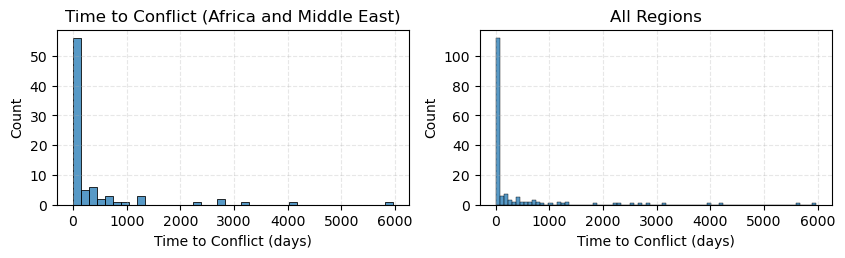

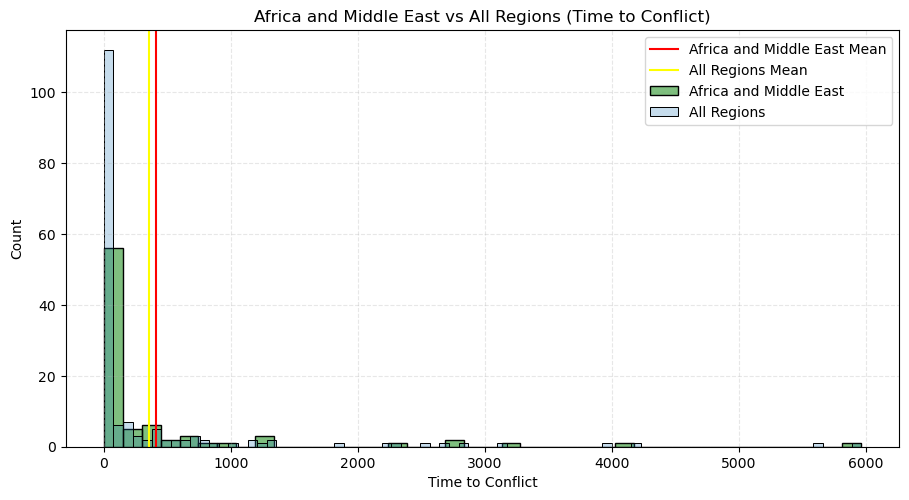

The mean time to conflict for Africa and the Middle East is 408.73.
The mean time to conflict for all regions is 358.82.


In [90]:
q2_plots()

In [115]:
ame=train[(train['region']=='2') | (train['region']=='4')]
trainmean=train['time_to_conflict'].mean()
t, p = stats.ttest_1samp(ame['time_to_conflict'], trainmean, alternative='less')

In [116]:
t,p

(0.46336727677060546, 0.6778356616933661)

**Takeaway**  
* The p-value is not lower than the alpha
* The average time to conflict for Africa and the Middle East is not significantlly different than the average time to conflict in the dataset

In [80]:
train.shape

(164, 12)

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>Is the average time to conflict for countries that have an intrastate conflict over government significantlly greater than the average time to conflict for countries that have an interstate conflict over territory?</dt>
        <dd>- $H_0$: There is no difference in between the average time to conflict for countries that have an intrastate conflict over government and the average time to conflict for countries that have an interstate conflict over territory</dd>
        <dd>- $H_a$: The average time to conflict for countries that have an intrastate conflict over government is significantlly greater compared to the average time to conflict for countries that have an interstate conflict over territory</dd>
    </dl>
</div>

In [100]:
train[(train['type_of_conflict']==3)&(train['incompatibility']==2)].shape

(46, 12)

In [83]:
train[(train['type_of_conflict']==3)&(train['incompatibility']==2)].time_to_conflict.mean()

425.3478260869565

In [95]:
train[(train['type_of_conflict']==2)&(train['incompatibility']==1)].shape

(18, 12)

In [86]:
train[(train['type_of_conflict']==2)&(train['incompatibility']==1)].time_to_conflict.mean()

112.83333333333333

In [145]:
def q3_plots():
    '''
    This function plots the necessary plots to visualize explore question 3
    '''
    intra=train[(train['type_of_conflict']==3)&(train['incompatibility']==2)]
    inter=train[(train['type_of_conflict']==2)&(train['incompatibility']==1)]
    
    plt.figure(figsize=(10,5))
    plt.subplot(221)
    sns.histplot(x='time_to_conflict', data=intra)
    plt.title('Time to Conflict (Intrastate/Government)')
    plt.xlabel('Time to Conflict (days)')
    plt.grid(True, alpha=0.3, linestyle='--')

    plt.subplot(222)
    sns.histplot(x='time_to_conflict', data=inter)
    plt.title('Time to Conflict (Interstate/Territory)')
    plt.xlabel('Time to Conflict (days)')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.figure(figsize=(25,10))
    plt.subplot(223)
    plt.title('Intrastate/Government vs Interstate/Territory Time to Conflict')
    sns.histplot(x='time_to_conflict', data=intra, alpha=.2, color='green', label= 'Intrastate/Government')
    sns.histplot(x='time_to_conflict', data=inter, alpha=1, label='Interstate/Territory')
    plt.xlabel('Time to Conflict')
    plt.axvline(x=(intra['time_to_conflict'].mean()), color='red', label='Intrastate/Government')
    plt.axvline(x=(inter['time_to_conflict'].mean()), color='yellow', label='Interstate/Territory')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()
    
    asiam=round(intra['time_to_conflict'].mean(),2)
    notasiam=round(inter['time_to_conflict'].mean(),2)
    print(f'The mean time to conflict for countries with intrastate conflict over government is {asiam}.')
    print(f'The mean time to conflict for countries with an interstate conflict over territory is {notasiam}.')

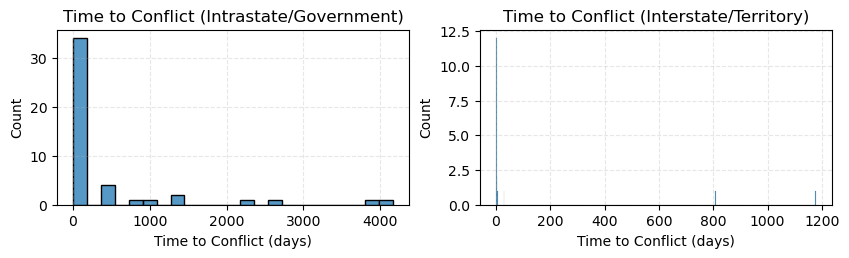

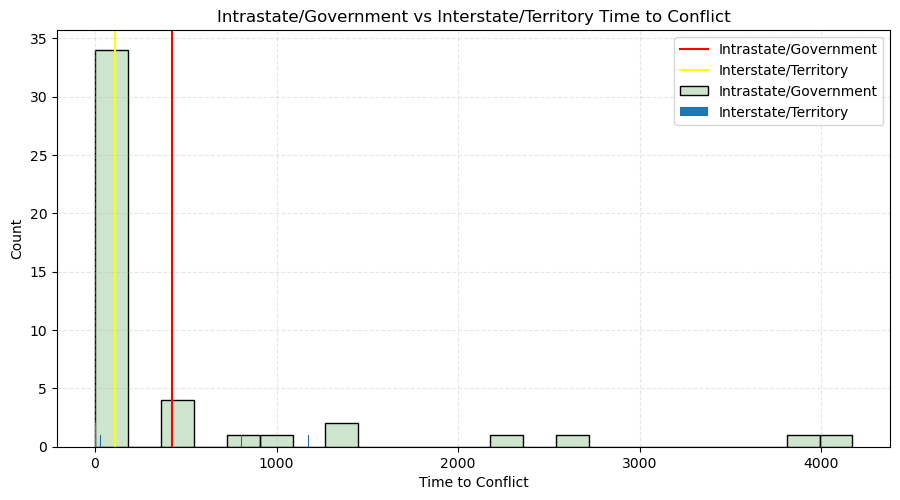

The mean time to conflict for countries with intrastate conflict over government is 425.35.
The mean time to conflict for countries with an interstate conflict over territory is 112.83.


In [146]:
q3_plots()

In [102]:
intra=train[(train['type_of_conflict']==3)&(train['incompatibility']==2)]
inter=train[(train['type_of_conflict']==2)&(train['incompatibility']==1)]
t, p=stats.mannwhitneyu(intra['time_to_conflict'], inter['time_to_conflict'], alternative='greater')

In [103]:
t,p

(474.5, 0.16154020529074364)

In [105]:
(425.35-112.83)/30

10.417333333333335

**Takeaway**
* The p-value is lower than the alpha
* I can say with confidence that the average time to conflict for countries with an intrastate conflict over government is significantly greater than the average time to conflict for countries with an interstate conflict over territory
* The difference of the mean days for time to conflict is 312 days or about 10 and a half months!

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 4:</h2>
    </header>
    <dl>
        <dt>Is the average time to conflict for countries that have an internationalized intrastate conflict significantly less than the average time to conflict for all conflicts in the dataset?</dt>
        <dd>- $H_0$: There is no difference in between the average time to conflict for countries that have an internationalized intrastate conflict and the average time to conflict for all conflicts in the dataset</dd>
        <dd>- $H_a$: The average time to conflict for countries that have an internationalized intrastate conflict is significantly less that the average time to conflict for all conflicts in the dataset</dd>
    </dl>
</div>

In [110]:
train[train['type_of_conflict']==4].time_to_conflict.mean()

136.66666666666666

In [113]:
def q4_plots():
    '''
    This function plots the necessary plots to visualize explore question 4
    '''
    ii=train[train['type_of_conflict']==4]
    
    plt.figure(figsize=(10,5))
    plt.subplot(221)
    sns.histplot(x='time_to_conflict', data=ii)
    plt.title('Internationalized Intrastate Time to Conflict')
    plt.xlabel('Time to Conflict (days)')
    plt.grid(True, alpha=0.3, linestyle='--')

    plt.subplot(222)
    sns.histplot(x='time_to_conflict', data=train)
    plt.title('All Regions')
    plt.xlabel('Time to Conflict (days)')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.figure(figsize=(25,10))
    plt.subplot(223)
    plt.title('Internationalized Intrastate vs All Regions Time to Conflict')
    sns.histplot(x='time_to_conflict', data=ii, alpha=.5, color='green', label= 'Internationalized Intrastate')
    sns.histplot(x='time_to_conflict', data=train, alpha=.25, label='All Regions')
    plt.xlabel('Time to Conflict')
    plt.axvline(x=(ii['time_to_conflict'].mean()), color='red', label='Internationalized Intrastate')
    plt.axvline(x=(train['time_to_conflict'].mean()), color='yellow', label='All Regions Mean')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()
    
    asiam=round(ii['time_to_conflict'].mean(),2)
    notasiam=round(train['time_to_conflict'].mean(),2)
    print(f'The mean time to conflict for Internationalized Intrastate conflicts is {asiam}.')
    print(f'The mean time to conflict for all regions is {notasiam}.')

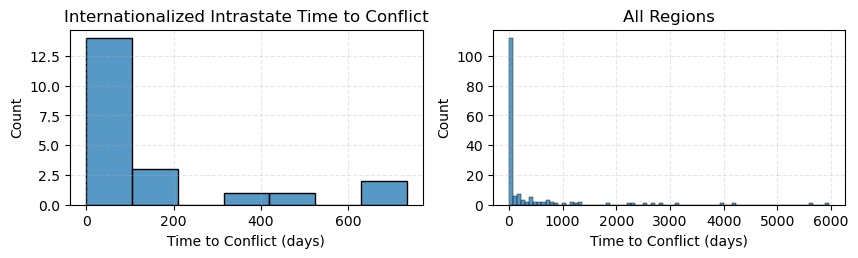

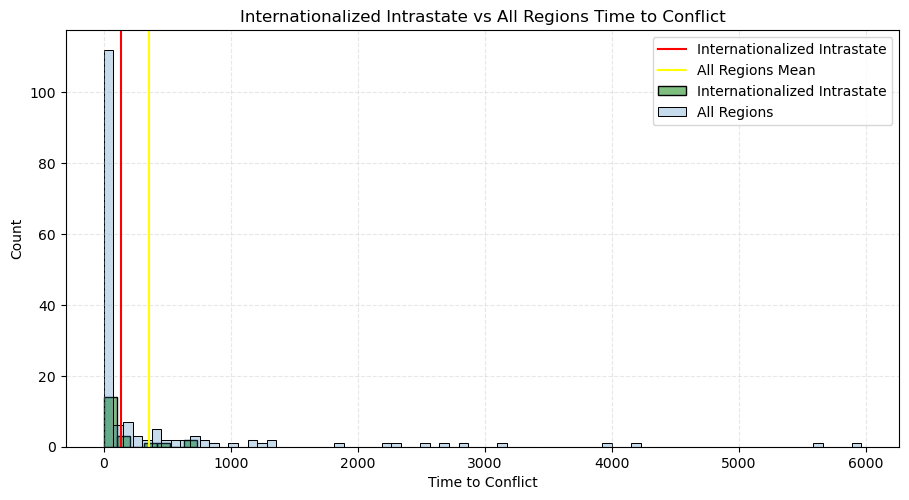

The mean time to conflict for Internationalized Intrastate conflicts is 136.67.
The mean time to conflict for all regions is 358.82.


In [114]:
q4_plots()

In [121]:
ii.shape, train.shape

((21, 12), (164, 12))

In [138]:
ii=train[train['type_of_conflict']==4]

In [139]:
ii2=[]
for x in ii['time_to_conflict']:
    ii2.append(x-359)

In [141]:
t,p=stats.wilcoxon(ii2, alternative='less')

In [142]:
t,p

(30.0, 0.0009293556213378906)

In [144]:
(358.82-136.67)/30

7.405

**Takeaway**
* The p-value is less than alpha
* I can say with confidence that the average time to conflict for internationalized intrastate conflict is significantly shorter that the average time to conflict in the dataset
* The difference between means is 222 days or about 7 and a half months!